In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
sns.set()

In [55]:
#https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
url='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
dateparse = lambda dates: [pd.datetime.strptime(d, '%d/%m/%Y') for d in dates]

data=pd.read_csv(url,sep=',',encoding='ISO-8859–1',parse_dates=['dateRep'],date_parser=dateparse)

In [56]:
#data.DateRep=pd.to_datetime(data['dateRep'])

In [57]:
data=data.drop(['day','month','year','geoId','countryterritoryCode'], axis=1)

In [58]:
data=data.rename(columns={'countriesAndTerritories':'country','cases':'new_cases','deaths':'new_deaths','dateRep':'date','popData2018':'Pop'})
data.set_index('country',inplace = True)

In [59]:
data.head()

,date,new_cases,new_deaths,Pop
country,,,,
Afghanistan,2020-04-13,52,0,37172386
Afghanistan,2020-04-12,34,3,37172386
Afghanistan,2020-04-11,37,0,37172386
Afghanistan,2020-04-10,61,1,37172386
Afghanistan,2020-04-09,56,3,37172386


In [60]:
print(data.index.unique())

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United_Republic_of_Tanzania', 'United_States_of_America',
       'United_States_Virgin_Islands', 'Uruguay', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=206)


In [61]:
print("A fecha " +str(data.date[0])[:10]+" en el mundo el número total de infectados es "+ str (data.new_cases.sum()) + " y el número total de muertos es " + str(data.new_deaths.sum())) 

A fecha 2020-04-13 en el mundo el número total de infectados es 1807308 y el número total de muertos es 113513


In [62]:
data['Pop'][data['date']==data.date[0]].sum()

7527438447.0

In [63]:
data_tot=data[['new_cases','new_deaths']].groupby('country').sum()
data_tot=data_tot.rename(columns={'new_cases':'total_cases','new_deaths':'total_deaths'})
data_tot['CFR']=data_tot['total_deaths']/data_tot['total_cases']*100
data_tot['CFR']=data_tot['CFR'].round(1)

In [64]:
#pd.options.display.float_format = '{:.0f}'.format
last_data=data[data['date']==data.date[0]]
last_data=last_data.join(data_tot,'country')
last_data['DpM']=last_data['total_deaths']/last_data['Pop']*(10**6)
last_data.sort_values('total_cases',ascending=False).head(10)

,date,new_cases,new_deaths,Pop,total_cases,total_deaths,CFR,DpM
country,,,,,,,,
United_States_of_America,2020-04-13,27620,1500,327167434,557571,22108,4,68
Spain,2020-04-13,4167,619,46723749,166019,16972,10,363
Italy,2020-04-13,4092,431,60431283,156363,19901,13,329
Germany,2020-04-13,2537,126,82927922,123016,2799,2,34
France,2020-04-13,1613,561,66987244,95403,14393,15,215
United_Kingdom,2020-04-13,5288,737,66488991,84279,10612,13,160
China,2020-04-13,112,2,1392730000,83209,3345,4,2
Iran,2020-04-13,1657,117,81800269,71686,4474,6,55
Turkey,2020-04-13,4789,97,82319724,56956,1198,2,15


In [65]:
country='Spain'
d=60
data.loc[country].iloc[:10]

,date,new_cases,new_deaths,Pop
country,,,,
Spain,2020-04-13,4167,619,46723749
Spain,2020-04-12,4830,510,46723749
Spain,2020-04-11,4576,605,46723749
Spain,2020-04-10,5756,683,46723749
Spain,2020-04-09,6180,757,46723749
Spain,2020-04-08,5478,743,46723749
Spain,2020-04-07,4273,637,46723749
Spain,2020-04-06,6023,674,46723749
Spain,2020-04-05,7026,809,46723749


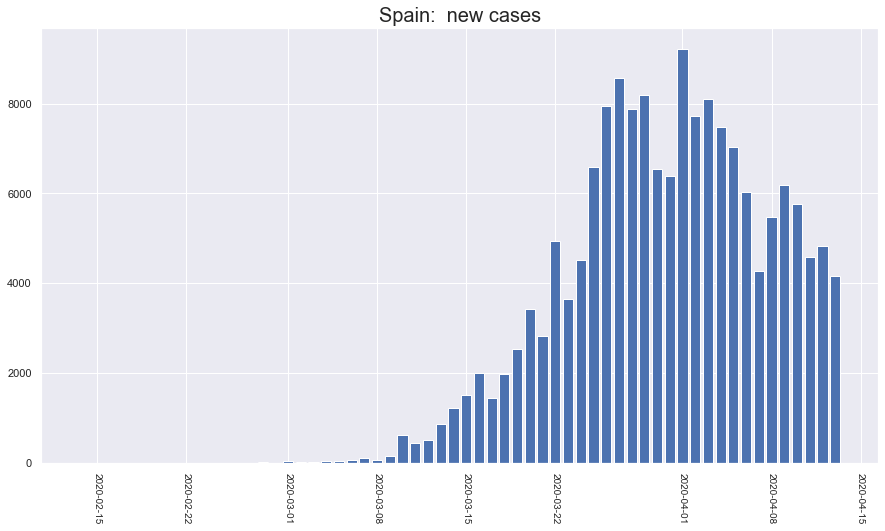

In [66]:
plt.figure(figsize=(15,8))
plt.bar(data.loc[country].date[:d],data.loc[country].new_cases[:d])
plt.tick_params('x',labelrotation=270, labelsize=10)
plt.title(str(country +":  "+'new cases'), size=20)
plt.show()

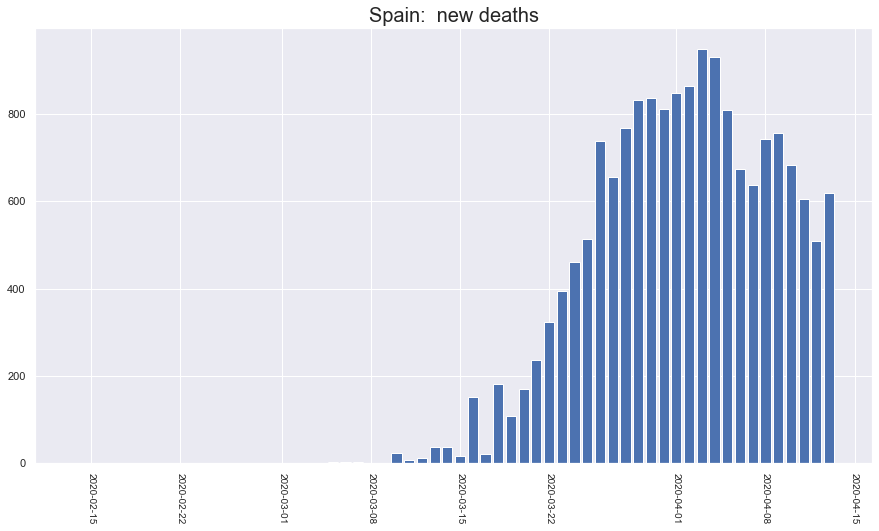

In [67]:
plt.figure(figsize=(15,8))
plt.bar(data.loc[country].date[:d],data.loc[country].new_deaths[:d])
plt.tick_params('x',labelrotation=270, labelsize=10)
plt.title(str(country +":  "+'new deaths'), size=20)
plt.show()

In [68]:
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.io import show,output_file
from bokeh.plotting import figure


In [69]:
source=ColumnDataSource(last_data[last_data['total_deaths']>=50])
plot=figure(plot_width=1800, plot_height=900, x_axis_type="log",y_axis_type="log")
#plot.line(x='new_cases',y='new_deaths',source=source, line_width=5)
plot.circle(x='total_cases',y='total_deaths',size='DpM',fill_color='blue',source=source,alpha=0.2)
hover=HoverTool(tooltips=[('country','@country'),('total cases','@total_cases'),('total deaths','@total_deaths'),('new cases','@new_cases'),('new deaths','@new_deaths'),('%CFR','@CFR'),('Dead/1M','@DpM')])
plot.add_tools(hover)
labels = LabelSet(x='total_cases', y='total_deaths', text='country', level='glyph', source=source, render_mode='canvas')
plot.add_layout(labels)
plot.xaxis[0].axis_label = 'total cases'
plot.yaxis[0].axis_label = 'total deaths'
output_file=('COVID-19.html')
show(plot)